# Business Goal: Predicting Probability of Default

This notebook shows the code for modelling with steps outlined in the attached document. The goal is to predict the probability of default

In [1]:
# importing needed libraries for EDA

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting random seed for reproducability
random.seed(79)

#### 1. Exploratory analysis

In [3]:
data = pd.read_csv('dataset.csv', sep=';')
data.head(1)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0


Checking shape of dataset, number of features given, null values, etc.

In [4]:
# Checking the shape of the dataframe
data.shape

(99976, 43)

The dataset includes 43 columns.

In [5]:
data.describe()

,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
count,89976.000000,9.997600e+04,88140.000000,88140.000000,88140.000000,40661.000000,45603.000000,45603.000000,33215.000000,42274.000000,...,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,9.997600e+04,99976.000000,30461.000000
mean,0.014315,1.225515e+04,0.223043,5.044622,0.286896,1.331292,1.042168,1.172905,1.337348,1.185291,...,0.744299,0.800582,1.052233,1.226164,4.035429,10816.065386,6542.895325,3.920880e+04,15.329780,1.121762
std,0.118786,3.548148e+04,5.808117,22.863971,2.929910,26.482299,0.202713,0.420142,0.575043,0.443309,...,0.634912,0.719946,0.786121,0.833502,163.934564,26463.972170,19041.223585,9.064929e+04,5.031360,0.343660
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000278,1.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.600000e+03,11.622708,1.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.152082,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.599500e+04,15.792778,1.000000
75%,0.000000,4.937250e+03,0.000000,0.000000,0.000000,0.662952,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,0.000000,9029.750000,85.000000,4.384425e+04,19.542014,1.000000
max,1.000000,1.128775e+06,365.000000,365.000000,97.000000,3914.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,5.000000,36479.000000,571475.000000,341859.000000,2.962870e+06,23.999722,3.000000


In [6]:
# Getting the number of unique values for each categorical variable features
for col in data.select_dtypes(include='object').columns:
    print(col, len(data[col].unique()))

uuid 99976
merchant_category 57
merchant_group 12
name_in_email 8


In [7]:
# Check the number of missing values in each column
data.isnull().sum()[:23]
data.isna().sum()[23:]

num_arch_dc_0_12m                      0
num_arch_dc_12_24m                     0
num_arch_ok_0_12m                      0
num_arch_ok_12_24m                     0
num_arch_rem_0_12m                     0
num_arch_written_off_0_12m         18078
num_arch_written_off_12_24m        18078
num_unpaid_bills                       0
status_last_archived_0_24m             0
status_2nd_last_archived_0_24m         0
status_3rd_last_archived_0_24m         0
status_max_archived_0_6_months         0
status_max_archived_0_12_months        0
status_max_archived_0_24_months        0
recovery_debt                          0
sum_capital_paid_account_0_12m         0
sum_capital_paid_account_12_24m        0
sum_paid_inv_0_12m                     0
time_hours                             0
worst_status_active_inv            69515
dtype: int64

In [8]:
# Checking from which row the default column has no entry so as to appropriate it as test dataset and exclude from analysis as unseen data
data[89975:].head(2)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
89975,f40bfa77-22e0-477e-95e2-2e05f468a66a,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,2,2,0,0,0,8410,18.925833,NaN
89976,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,NaN,0,0.0,0.0,0.0,0.009135,1.0,1.0,NaN,...,1,1,1,1,0,8815,0,27157,19.895556,NaN


In [9]:
# Extracting the test data out of the whole dataset
df_val = data[89976:]
df_val.head(1)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
89976,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,NaN,0,0.0,0.0,0.0,0.009135,1.0,1.0,NaN,...,1,1,1,1,0,8815,0,27157,19.895556,NaN


In [10]:
# And the rest data as df. This will further be splitted into train and validation sets
df = data[:89976]
df.head(1)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0


In [11]:
# Checking data types of the columns
df.dtypes[:22]
df.dtypes[22:]

num_active_inv                       int64
num_arch_dc_0_12m                    int64
num_arch_dc_12_24m                   int64
num_arch_ok_0_12m                    int64
num_arch_ok_12_24m                   int64
num_arch_rem_0_12m                   int64
num_arch_written_off_0_12m         float64
num_arch_written_off_12_24m        float64
num_unpaid_bills                     int64
status_last_archived_0_24m           int64
status_2nd_last_archived_0_24m       int64
status_3rd_last_archived_0_24m       int64
status_max_archived_0_6_months       int64
status_max_archived_0_12_months      int64
status_max_archived_0_24_months      int64
recovery_debt                        int64
sum_capital_paid_account_0_12m       int64
sum_capital_paid_account_12_24m      int64
sum_paid_inv_0_12m                   int64
time_hours                         float64
worst_status_active_inv            float64
dtype: object

In [12]:
#Checking for class imbalance. There is class imbalance and we will need to resample the data

df_imb = df.groupby('default')['uuid'].count().reset_index()
df_imb['Percentage'] = 100 * df_imb['uuid'] / df_imb['uuid'].sum()
df_imb

,default,uuid,Percentage
0,0.0,88688,98.568507
1,1.0,1288,1.431493


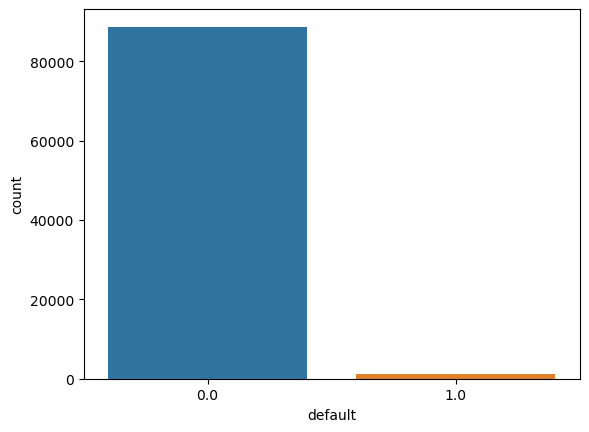

In [13]:
# Visualizing the distribution of the target variable. The class imbalance is also evident in the distribution of the target variable
sns.countplot(x='default', data=df) 
plt.show()


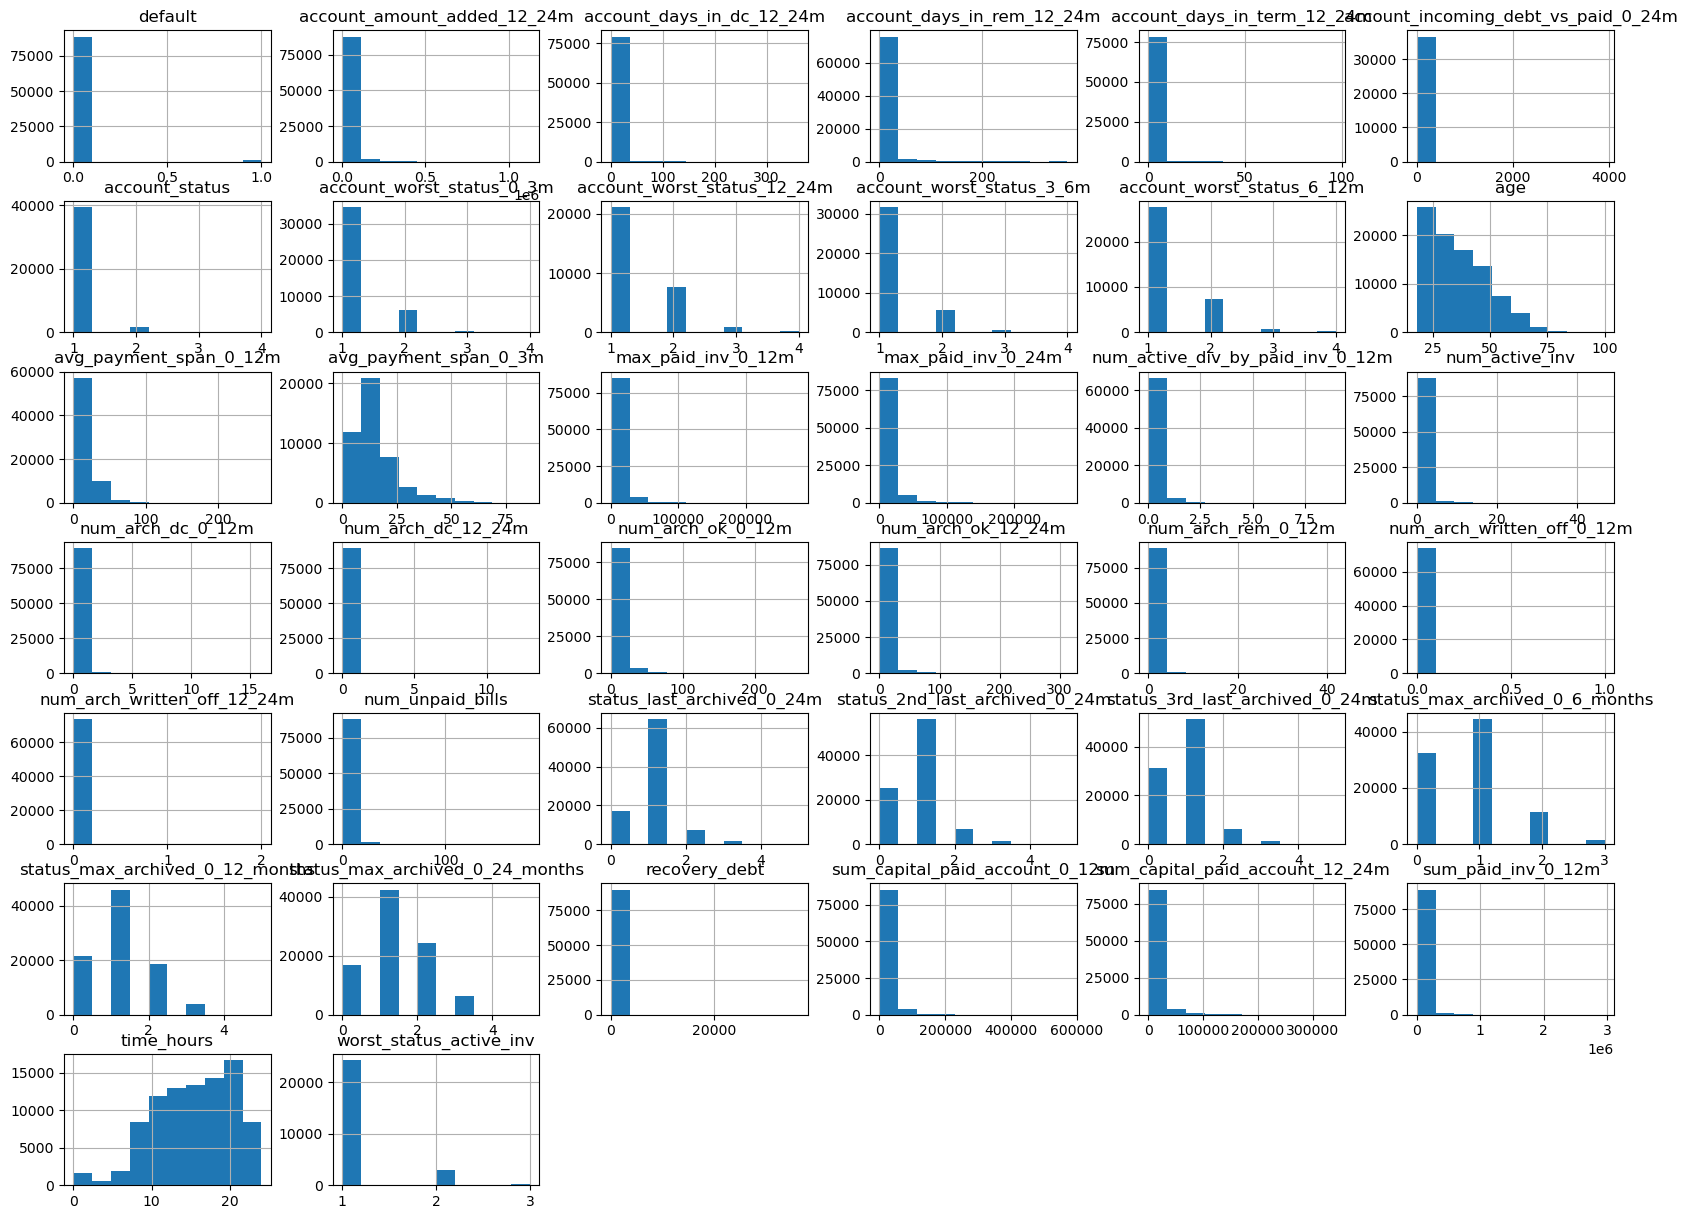

In [14]:
# Check the distribution of the numerical features
df.select_dtypes(include=[np.number]).hist(figsize=(20, 15))
plt.show()

In [15]:
# Checking the correlation between the default feature and other features and sorting them descending order
corr_sort = df.corr().sort_values('default', ascending=False)
corr_sort.iloc[:, 0:1]

/var/folders/_9/5xfrlsr10hjg0fh3cpdx3ctw0000gn/T/ipykernel_2331/2618993334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_sort = df.corr().sort_values('default', ascending=False)


,default
default,1.000000
avg_payment_span_0_12m,0.197384
account_worst_status_6_12m,0.168975
account_worst_status_0_3m,0.159137
account_worst_status_12_24m,0.158235
account_worst_status_3_6m,0.156539
num_active_div_by_paid_inv_0_12m,0.137428
account_status,0.120683
num_arch_dc_0_12m,0.107296
num_arch_dc_12_24m,0.100891


#### 2. Preprocessing

After EDA is preprocessing then modelling. This involve handling the missing values, encoding categorical variables, and scaling the numeric variables. Then, I would split the data into training and validation sets.

In [16]:
# Remove rows with missing values
df['has_paid'] = df['has_paid'].astype(int)
df.fillna(0, inplace=True)
df.replace(np.nan, 0, inplace=True)

/var/folders/_9/5xfrlsr10hjg0fh3cpdx3ctw0000gn/T/ipykernel_2331/893254336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_paid'] = df['has_paid'].astype(int)
/var/folders/_9/5xfrlsr10hjg0fh3cpdx3ctw0000gn/T/ipykernel_2331/893254336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)
/var/folders/_9/5xfrlsr10hjg0fh3cpdx3ctw0000gn/T/ipykernel_2331/893254336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [17]:
X = df.drop(['uuid', 'default'], axis=1)
y = df['default']
X.head(1)

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,1,1,0,0,0,178839,9.653333,1.0


2.1: Importing split library and splitting training dataset

In [18]:
#Sklearn
from sklearn.model_selection import (train_test_split, RandomizedSearchCV, cross_validate)

# Assemble pipeline(s)
from sklearn import set_config
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer

# Handle constant/duplicates and missing features/columns
from feature_engine.selection import (DropFeatures, DropConstantFeatures, 
                                      DropDuplicateFeatures)

# Sampling
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

set_config(display="diagram")  # make pipeline visible

In [19]:
# Splitting the remaining dataset to train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=41, stratify=y)

In [20]:
#checking the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71980, 41), (17996, 41), (71980,), (17996,))

#### 3. Modelling 

To decide the model, I will train six classification models on the training set using RandomizedSearchCV to find the best hyperparameters.

In [21]:
# Define the features to be used
numeric_features = ['account_amount_added_12_24m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m', 'num_unpaid_bills', 'recovery_debt', 'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m', 'sum_paid_inv_0_12m', 'time_hours']
categorical_features = ['account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 'account_worst_status_3_6m', 'merchant_category', 'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months', 'worst_status_active_inv']


# Define SMOTE sampling strategy
sampling = SMOTE(random_state=42)

# Define treatment for numeric and categorical features
scaler = MinMaxScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Define column transformer for preprocessing of different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', onehot, categorical_features)
    ])

In [22]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = GradientBoostingClassifier(random_state=42)

In [23]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100]
param1['classifier__max_depth'] = [2, 5, 10]
param1['classifier__class_weight'] = [None, {0:1,1:3}, {0:1,1:5}, {0:1,1:10}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1]
param2['classifier__class_weight'] = [None, {0:1,1:3}, {0:1,1:5}, {0:1,1:10}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:3}, {0:1,1:5}, {0:1,1:10}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [2,5,12,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:3}, {0:1,1:5}, {0:1,1:10}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,20]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__n_estimators'] = [10, 50, 100]
param6['classifier__max_depth'] = [2, 5, 10]
param6['classifier'] = [clf6]

In [24]:
pipeline = imbPipeline([
    ('datafeed', preprocessor),              # grabs finalized datasets
    #('smote', SMOTE()),
    ('classifier', clf1)           # Logistic modeling
])

In [25]:
params = [param1, param2, param3, param4, param5, param6]

In [26]:
rs = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

In [27]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'classifier__penalty': 'l2',
 'classifier__class_weight': {0: 1, 1: 10},
 'classifier__C': 0.1,
 'classifier': LogisticRegression(C=0.1, class_weight={0: 1, 1: 10}, random_state=42)}

In [28]:
rs.best_score_

0.8987899829426689

In [29]:
# Test data performance
print("Precision:",precision_score(rs.predict(X_test), y_test))
print("Recall:",recall_score(rs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(rs.predict(X_test), y_test))
print("Accuracy Score:",accuracy_score(rs.predict(X_test), y_test))
print("F1 Score:",f1_score(rs.predict(X_test), y_test))

Precision: 0.375968992248062
Recall: 0.1735241502683363
ROC AUC Score: 0.5821454553027752
Accuracy Score: 0.9653811958212937
F1 Score: 0.23745410036719705


In [30]:
# create a confusion matrix
conf_matrix = confusion_matrix(rs.predict(X_test), y_test)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[17276   161]
 [  462    97]]


WIth the best model being the logistic regression, I will now rebuild the model with further feature engineering with the column transformer.

In [31]:
''' Further treatment for each of the columns in the training data set

age                                   int64 / bin

account_days_in_dc_12_24m           float64 / impute 0, scale
account_days_in_rem_12_24m          float64 / impute 0, scale
account_days_in_term_12_24m         float64 / impute 0, scale
avg_payment_span_0_12m              float64 / impute 0, scale
avg_payment_span_0_3m               float64 / impute 0, scale
num_active_div_by_paid_inv_0_12m    float64 / impute 0, scale


has_paid                               bool / encode

merchant_category                    object / encode
merchant_group                       object / encode
name_in_email                       object / encode
status_last_archived_0_24m           int64  / encode
status_3rd_last_archived_0_24m       int64  / encode
status_max_archived_0_6_months       int64  / encode
status_max_archived_0_24_months      int64  / encode

max_paid_inv_0_12m                  float64 / scale
max_paid_inv_0_24m                  float64 / scale
num_active_inv                        int64 / scale
num_arch_dc_0_12m                     int64 / scale
num_arch_dc_12_24m                    int64 / scale
num_arch_ok_0_12m                     int64 / scale
num_arch_ok_12_24m                    int64 / scale
num_unpaid_bills                     int64  / scale
recovery_debt                        int64  / scale
sum_paid_inv_0_12m                   int64  / scale
time_hours                         float64  / scale

account_status                      float64 / impute mode, encode
account_worst_status_0_3m           float64 / impute mode, encode
account_worst_status_12_24m         float64 / impute mode, encode
account_worst_status_3_6m           float64 / impute mode, encode
account_worst_status_6_12m          float64 / impute mode, encode
num_arch_written_off_0_12m          float64 / impute mode, encode
worst_status_active_inv            float64  / impute mode, encode

'''                    

' Further treatment for each of the columns in the training data set\n\nage                                   int64 / bin\n\naccount_days_in_dc_12_24m           float64 / impute 0, scale\naccount_days_in_rem_12_24m          float64 / impute 0, scale\naccount_days_in_term_12_24m         float64 / impute 0, scale\navg_payment_span_0_12m              float64 / impute 0, scale\navg_payment_span_0_3m               float64 / impute 0, scale\nnum_active_div_by_paid_inv_0_12m    float64 / impute 0, scale\n\n\nhas_paid                               bool / encode\n\nmerchant_category                    object / encode\nmerchant_group                       object / encode\nname_in_email                       object / encode\nstatus_last_archived_0_24m           int64  / encode\nstatus_3rd_last_archived_0_24m       int64  / encode\nstatus_max_archived_0_6_months       int64  / encode\nstatus_max_archived_0_24_months      int64  / encode\n\nmax_paid_inv_0_12m                  float64 / scale\nmax_p

In [32]:
# making pipeline for features that requires two or more transformation

impute_and_scale = make_pipeline(SimpleImputer(fill_value=0), MinMaxScaler())
impute_and_ohe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse=False, handle_unknown='ignore'))
binning = make_pipeline(KBinsDiscretizer(n_bins=6, encode='onehot-dense'))
encode = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))
scale = make_pipeline(MinMaxScaler())

In [33]:
#(name, transformer, columns)
fe = ColumnTransformer([
    ('impute&scale', impute_and_scale, ['account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'avg_payment_span_0_12m', 
    'avg_payment_span_0_3m', 'num_active_div_by_paid_inv_0_12m']),
    
    ('impute&encode', impute_and_ohe, ['account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 'account_worst_status_3_6m', 
    'account_worst_status_6_12m', 'num_arch_written_off_0_12m', 'worst_status_active_inv']),

    ('binning', binning, ['age']),

    ('encoding', encode, ['has_paid', 'merchant_category', 'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 
    'status_max_archived_0_6_months', 'status_max_archived_0_24_months']),

    ('scaling', scale, ['max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 
    'num_arch_ok_12_24m', 'num_unpaid_bills', 'recovery_debt', 'sum_paid_inv_0_12m', 'time_hours'])
])
fe

ColumnTransformer(transformers=[('impute&scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['account_days_in_dc_12_24m',
                                  'account_days_in_rem_12_24m',
                                  'account_days_in_term_12_24m',
                                  'avg_payment_span_0_12m',
                                  'avg_payment_span_0_3m',
                                  'num_active_div_by_paid_inv_0_12m']),
                                ('impute&encode',
                                 Pipeline(steps=...
                                  'status_3rd_last_archived_0_24m',
                                  'status_max_archived_0_6_months',
                                  'status_max_archived_0_24_months']),
                                ('scaling',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['max_paid_inv_0_12m', 'max_paid_inv_0_24m',
                                  'num_active_inv', 'num_arch_dc_0_12m',
                                  'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
                                  'num_arch_ok_12_24m', 'num_unpaid_bills',
                                  'recovery_debt', 'sum_paid_inv_0_12m',
                                  'time_hours'])])

In [34]:
pipe = imbPipeline([
    ('datafeed', fe),                     # grabs finalized datasets
    ('smote', SMOTE()),                   # smote sampling
    ('classifier', LogisticRegression(max_iter=10000))  # Logistic modeling
])

In [36]:
# train the model
pipe.fit(X_train,y_train)

/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('datafeed',
                 ColumnTransformer(transformers=[('impute&scale',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'avg_payment_span_0_12m',
                                                   'avg_payment_span_0_3m',
                                                   'num_active_div_by_paid_inv_0_12m']),
                                                 ('im...
                                                   'status_max_archived_0_24_months']),
                                                 ('scaling',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['max_paid_inv_0_12m',
                                                   'max_paid_inv_0_24m',
                                                   'num_active_inv',
                                                   'num_arch_dc_0_12m',
                                                   'num_arch_dc_12_24m',
                                                   'num_arch_ok_0_12m',
                                                   'num_arch_ok_12_24m',
                                                   'num_unpaid_bills',
                                                   'recovery_debt',
                                                   'sum_paid_inv_0_12m',
                                                   'time_hours'])])),
                ('smote', SMOTE()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [37]:
pipe.score(X_test,y_test) #The score with SMOTE, so I will rebuild the column transformer without the SMOTE

0.8157923983107357

In [50]:
# Building the model together with feature engeenering
one_go_mlr = make_pipeline(fe, LogisticRegression(max_iter=10000))
one_go_mlr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute&scale',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'avg_payment_span_0_12m',
                                                   'avg_payment_span_0_3m',
                                                   'num_active_div_by_paid_inv_0_12...
                                                   'status_max_archived_0_24_months']),
                                                 ('scaling',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['max_paid_inv_0_12m',
                                                   'max_paid_inv_0_24m',
                                                   'num_active_inv',
                                                   'num_arch_dc_0_12m',
                                                   'num_arch_dc_12_24m',
                                                   'num_arch_ok_0_12m',
                                                   'num_arch_ok_12_24m',
                                                   'num_unpaid_bills',
                                                   'recovery_debt',
                                                   'sum_paid_inv_0_12m',
                                                   'time_hours'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [51]:
one_go_mlr.fit(X_train,y_train)

/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sirvictorson/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute&scale',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'avg_payment_span_0_12m',
                                                   'avg_payment_span_0_3m',
                                                   'num_active_div_by_paid_inv_0_12...
                                                   'status_max_archived_0_24_months']),
                                                 ('scaling',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['max_paid_inv_0_12m',
                                                   'max_paid_inv_0_24m',
                                                   'num_active_inv',
                                                   'num_arch_dc_0_12m',
                                                   'num_arch_dc_12_24m',
                                                   'num_arch_ok_0_12m',
                                                   'num_arch_ok_12_24m',
                                                   'num_unpaid_bills',
                                                   'recovery_debt',
                                                   'sum_paid_inv_0_12m',
                                                   'time_hours'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [52]:
# make predictions on the validation set
y_test_pred = one_go_mlr.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# calculate precision
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

# calculate recall
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)

# calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 score:", f1)

# create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9848299622138253
Precision: 0.2222222222222222
Recall: 0.023255813953488372
F1 score: 0.042105263157894736
Confusion matrix:
 [[17717    21]
 [  252     6]]


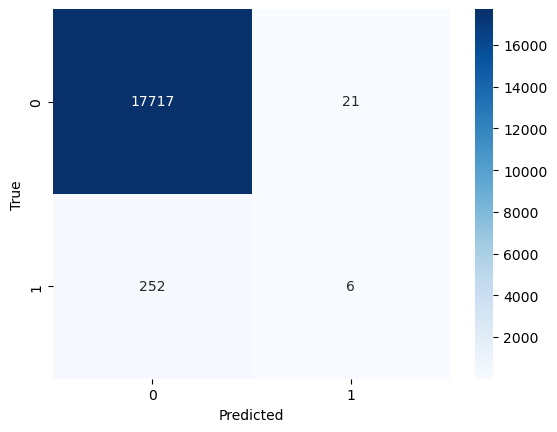

In [54]:
import seaborn as sns

# plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
import joblib

# save the best model
joblib.dump(one_go_mlr, 'best_model.joblib')

['best_model.joblib']

In [56]:
import pickle

# Save the model to disk
filename = 'best_model.pkl'
pickle.dump(one_go_mlr, open(filename, 'wb'))

In [83]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('impute&scale',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'avg_payment_span_0_12m',
                                                   'avg_payment_span_0_3m',
                                                   'num_active_div_by_paid_inv_0_12...
                                                   'status_max_archived_0_24_months']),
                                                 ('scaling',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['max_paid_inv_0_12m',
                                                   'max_paid_inv_0_24m',
                                                   'num_active_inv',
                                                   'num_arch_dc_0_12m',
                                                   'num_arch_dc_12_24m',
                                                   'num_arch_ok_0_12m',
                                                   'num_arch_ok_12_24m',
                                                   'num_unpaid_bills',
                                                   'recovery_debt',
                                                   'sum_paid_inv_0_12m',
                                                   'time_hours'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [84]:
X_val = df_val.drop(['uuid', 'default'], axis=1)

In [85]:
y_val = df_val['default']

In [86]:
# Removing rows with missing values
X_val['has_paid'] = X_val['has_paid'].astype(int)
X_val.fillna(0, inplace=True)
X_val.replace(np.nan, 0, inplace=True)

In [89]:
y_val_pred = loaded_model.predict_proba(X_val) 
y_val_pred

array([[0.99451186, 0.00548814],
       [0.98750784, 0.01249216],
       [0.99806993, 0.00193007],
       ...,
       [0.81199681, 0.18800319],
       [0.99370332, 0.00629668],
       [0.995886  , 0.004114  ]])

In [107]:
ypred = pd.DataFrame(loaded_model.predict(X_val))

In [108]:
uuid = df_val[['uuid']].reset_index(drop=True)

In [109]:
ypred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [113]:
uuid

,uuid
0,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7
1,f6f6d9f3-ef2b-4329-a388-c6a687f27e70
2,e9c39869-1bc5-4375-b627-a2df70b445ea
3,6beb88a3-9641-4381-beb6-c9a208664dd0
4,bb89b735-72fe-42a4-ba06-d63be0f4ca36
...,...
9995,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34
9996,f8db22f4-9819-420c-abbc-9ddf1843176e
9997,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8
9998,bafcab15-9898-479c-b729-c9dda7edb78f


In [114]:
predicted = pd.concat([uuid, ypred], axis=1, ignore_index=True)

In [115]:
predicted.rename({0: 'uuid', 1:'pd'}, axis=1).to_csv('prediction.csv', sep=';')


In [116]:
predicted

,0,1
0,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,0.0
1,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,0.0
2,e9c39869-1bc5-4375-b627-a2df70b445ea,0.0
3,6beb88a3-9641-4381-beb6-c9a208664dd0,0.0
4,bb89b735-72fe-42a4-ba06-d63be0f4ca36,0.0
...,...,...
9995,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,0.0
9996,f8db22f4-9819-420c-abbc-9ddf1843176e,0.0
9997,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,0.0
9998,bafcab15-9898-479c-b729-c9dda7edb78f,0.0


In [117]:
pred_rename = predicted.rename({0: 'uuid', 1:'pd'}, axis=1)

In [118]:
mask = pred_rename['uuid'] == 'f6f6d9f3-ef2b-4329-a388-c6a687f27e70'

In [119]:
pred_rename[pred_rename['uuid'] == 'f6f6d9f3-ef2b-4329-a388-c6a687f27e70']

,uuid,pd
1,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,0.0


In [120]:
pred_rename

,uuid,pd
0,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,0.0
1,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,0.0
2,e9c39869-1bc5-4375-b627-a2df70b445ea,0.0
3,6beb88a3-9641-4381-beb6-c9a208664dd0,0.0
4,bb89b735-72fe-42a4-ba06-d63be0f4ca36,0.0
...,...,...
9995,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,0.0
9996,f8db22f4-9819-420c-abbc-9ddf1843176e,0.0
9997,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,0.0
9998,bafcab15-9898-479c-b729-c9dda7edb78f,0.0


In [121]:
pred_rename.loc[pred_rename['pd'] == 1.0]

,uuid,pd
1785,b077c250-4b1e-4445-88cd-686fdfd3c143,1.0
2533,e2498e19-ba1c-47b8-89e9-adf6930df86f,1.0
2834,dfdc0d75-ebc9-49f1-8463-ce70e0b6671e,1.0
3034,9e3fa4ee-e5d6-4847-8798-50c4a134800f,1.0
3378,e7d1da4a-6f82-4840-95d3-20e063cd0ff3,1.0
3609,aabfb4de-b7bd-4fc7-9364-db19759aa7a1,1.0
3887,3f0ffbcc-c8cb-4591-a67a-6f91a99d0d65,1.0
4972,47382544-2c13-46c3-a8e0-e608356ad0bc,1.0
5338,7d4e7616-6bd8-4248-a9da-7b53d7257a8d,1.0
5808,22c72863-191e-4e84-9f12-6c4b77d86a86,1.0


In [122]:
mask

0       False
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: uuid, Length: 10000, dtype: bool

In [123]:
pred_rename.loc[mask, 'pd'].tolist()[0]

0.0

In [124]:
def get_pred(userid):
    mask = pred_rename['uuid'] == userid
    default = pred_rename.loc[mask, 'pd'].tolist()[0]
    return default

In [125]:
get_pred('b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8')

0.0